# Music Recommendation System
- Jonathan Rai

## Dataset Description
- In this task, you will be asked to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set. The same rule applies to the testing set.

- KKBOX provides a training data set consists of information of the first observable listening event for each unique user-song pair within a specific time duration. Metadata of each unique user and song pair is also provided. The use of public data to increase the level of accuracy of your prediction is encouraged.

- The train and the test data are selected from users listening history in a given time period. Note that this time period is chosen to be before the WSDM-KKBox Churn Prediction time period. The train and test sets are split based on time, and the split of public/private are based on unique user/song pairs.

## Tables
#### train.csv
- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

#### test.csv
- id: row id (will be used for submission)
- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

#### sample_submission.csv
sample submission file in the format that we expect you to submit

- id: same as id in test.csv
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

#### songs.csv
The songs. Note that data is in unicode.

- song_id
- song_length: in ms
- genre_ids: genre category. Some songs have multiple genres and they are separated by |
artist_name
composer
lyricist
language

#### members.csv
user information.

- msno
- city
- bd: age. Note: this column has outlier values, please use your judgement.
gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d

#### song_extra_info.csv
- song_id
- song name - the name of the song.
- isrc - International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

In [1]:
#The files provided are zipped hence need to unzip and extract our datasets
#!pip install py7zr
import py7zr

In [2]:
# Unzipping 7z files
df1 = py7zr.SevenZipFile("train.csv.7z", mode='r')
df1.extractall(path='Dataset')
df1.close()


- If I would want to extract in same directory instead of dataset folder then
-  Unzipping the "members.csv.7z" file in the same folder
    - df2 = py7zr.SevenZipFile("members.csv.7z", mode='r')
    - df2.extractall()
    - df2.close()

In [3]:
df2 = py7zr.SevenZipFile("members.csv.7z",mode='r')
df2.extractall(path='Dataset')
df2.close()

df3 = py7zr.SevenZipFile("song_extra_info.csv.7z",mode='r')
df3.extractall(path='Dataset')
df3.close()

df4 = py7zr.SevenZipFile("songs.csv.7z",mode='r')
df4.extractall(path='Dataset')
df4.close()

df5 = py7zr.SevenZipFile("test.csv.7z",mode='r')
df5.extractall(path='Dataset')
df5.close()

df6 = py7zr.SevenZipFile("sample_submission.csv.7z",mode='r')
df6.extractall(path='Dataset')
df6.close()

- 'py7zr' library is used to unzip a 7z compressed file and extract its contents to a specified directory

- the above code unzips the files like "train.csv.7z" file and extracts its contents to the "Dataset" directory. After running this code, we can find the "train.csv" file (or whatever file(s) were inside the 7z archive) in the "Dataset" directory.

#### Importing other necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading dataset

In [5]:
train = pd.read_csv("Dataset/train.csv")
songs = pd.read_csv("Dataset/songs.csv")
members = pd.read_csv("Dataset/members.csv")
song_info = pd.read_csv("Dataset/song_extra_info.csv")
test = pd.read_csv("Dataset/test.csv")
sample_submission = pd.read_csv("Dataset/sample_submission.csv")

In [6]:
train.shape

(7377418, 6)

In [7]:
songs.shape

(2296320, 7)

In [8]:
members.shape

(34403, 7)

In [9]:
song_info.shape

(2295971, 3)

In [10]:
test.shape

(2556790, 6)

In [11]:
sample_submission.shape

(2556790, 2)

- Considering only 20k tuples from required dataset

In [12]:
train_df = pd.read_csv("Dataset/train.csv",nrows=20000)
songs_df = pd.read_csv("Dataset/songs.csv",nrows=20000)
members_df = pd.read_csv("Dataset/members.csv")
song_extra_info_df = pd.read_csv("Dataset/song_extra_info.csv")
test_df = pd.read_csv("Dataset/test.csv")
sample_submission_df = pd.read_csv("Dataset/sample_submission.csv",nrows=20000)

In [13]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [14]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [15]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [16]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [17]:
song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [18]:
sample_submission_df.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


#### Data Preprocessing

- Checking for null values

In [19]:
train_df.isna().sum()

msno                    0
song_id                 0
source_system_tab      67
source_screen_name    576
source_type            50
target                  0
dtype: int64

- We'll use only msno and song_id attribute, so no missing values 
- Removing all attributes except msno and song_id

In [20]:
train_df=train_df.drop(['source_system_tab','source_screen_name','source_type'],axis=1)
train_df.head()

,msno,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


- Renaming msno as user_id

In [21]:
train_df.rename(columns={'msno':'user_id'},inplace=True)
train_df.head()

,user_id,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


In [22]:
train_df.shape

(20000, 3)

In [23]:
songs_df.isna().sum()

song_id            0
song_length        0
genre_ids        346
artist_name        0
composer        8382
lyricist       14332
language           0
dtype: int64

In [24]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      20000 non-null  object 
 1   song_length  20000 non-null  int64  
 2   genre_ids    19654 non-null  object 
 3   artist_name  20000 non-null  object 
 4   composer     11618 non-null  object 
 5   lyricist     5668 non-null   object 
 6   language     20000 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


- Filling the missing values

In [25]:
songs_df['genre_ids'].fillna(' ',inplace=True)
songs_df['composer'].fillna(' ',inplace=True)
songs_df['lyricist'].fillna(' ',inplace=True)

- We'll use all attributes except song_length and language

In [26]:
songs_df.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       0
dtype: int64

In [27]:
song_extra_info_df.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

- We'll not use isrc attribute in our main dataset so, no need to clean it


In [28]:
train_df.head()

,user_id,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


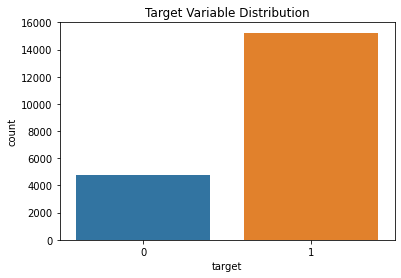

In [83]:
# Explore the target variable distribution
sns.countplot(x='target', data=train_df)
plt.title('Target Variable Distribution')
plt.show()



In [88]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,,,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


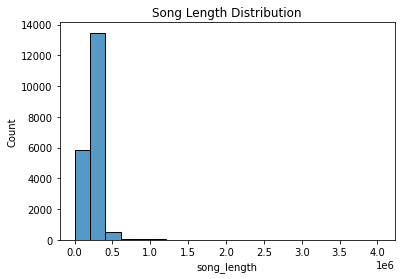

In [86]:
# Explore the distribution of song lengths in songs_df
sns.histplot(songs_df['song_length'], bins=20)
plt.title('Song Length Distribution')
plt.show()

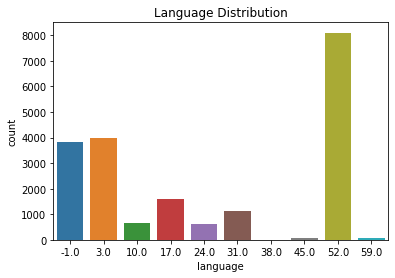

In [87]:
# Explore the distribution of language in songs_df
sns.countplot(x='language', data=songs_df)
plt.title('Language Distribution')
plt.show()

#### Preparing Main Dataset
- Creating new dataframe main_df by merging train_df and songs_df

In [30]:
main_df = train_df
main_df.head()

,user_id,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


- Merging main_df and song_df


In [31]:
main_df = main_df.merge(songs_df, on='song_id')

In [32]:
main_df.head()

,user_id,song_id,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,247803,1259,Desiigner,Sidney Selby| Adnan Khan,,52.0
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,247803,1259,Desiigner,Sidney Selby| Adnan Khan,,52.0
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,249443,458,莊心妍,鄭建浩,鄭建浩,3.0
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,249443,458,莊心妍,鄭建浩,鄭建浩,3.0
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,249443,458,莊心妍,鄭建浩,鄭建浩,3.0


- Dropping song_length and language columns

In [33]:
main_df = main_df.drop(['song_length', 'language'],axis=1)
main_df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩


In [34]:
song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


- Merging song_extra_info_df and main_df

- Droping isrc attribute.

In [35]:
main_df = main_df.merge(song_extra_info_df, on='song_id').drop('isrc', axis=1)
main_df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好


- Renaming name attribute with song_name

In [36]:
main_df.rename(columns={'name':'song_name'}, inplace=True)
main_df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好


#### Performing Preprocessing for our constructed main_df dataset

In [37]:
main_df['genre_ids'].value_counts()

465                    710
458                    400
444                     65
1609                    57
921                     49
359                     32
                        26
139                     24
2022                    21
1259                    20
2122                    13
139|125|109              7
726                      7
451                      7
437                      7
958                      6
786|947                  6
465|1259                 4
1011                     4
786                      4
947                      4
691                      3
921|465                  3
430                      3
921|458                  2
458|1287                 2
698                      2
444|1259                 2
829                      2
850                      2
1152                     1
880|458                  1
465|829                  1
864|857|850|843          1
465|798                  1
474                      1
864|850|726|857|843      1
3

- There are lots of | in genre_ids. Replacing | with ' '
- Replacing '|' with a space ' ', the different genre IDs are combined into a single string, which can be more convenient for further analysis or modeling.

In [38]:
main_df['genre_ids'] = main_df['genre_ids'].str.replace('|', ' ', regex=True)
main_df['genre_ids'].value_counts().tail()

1609 465    1
465 2122    1
423         1
726 242     1
437 850     1
Name: genre_ids, dtype: int64

In [39]:
main_df.shape

(1509, 8)

- Here in attributes (artist_name, commposer and lyricist) have '/' and '|' symbols.
- Replacing it with " "

In [40]:
main_df['artist_name'] = main_df['artist_name'].str.replace( '|',' ', regex=True)
main_df['artist_name'] = main_df['artist_name'].str.replace( '/',' ',  regex=True)

main_df['lyricist'] = main_df['lyricist'].str.replace( '|',' ', regex=True)
main_df['lyricist'] = main_df['lyricist'].str.replace( '/',' ', regex=True)

main_df['composer'] = main_df['composer'].str.replace( '|',' ', regex=True)
main_df['composer'] = main_df['composer'].str.replace( '/',' ', regex=True)

In [41]:
main_df.sample(10)

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name
195,6xIno4/kpVsTK7ChsYaF+b/0cqMLc1GUzvmhq3PzLyo=,KcQ4assZxaXsdizqxGjUSAY7CNc6+6hQzpVsjnWsShQ=,1,458,楊凱琳 (Rosie),艾怡良,黃祖蔭 余琛懋,怎麼還不愛 (Why Not Love)
469,6v8Jemjp+1m3F1R8PILMTByss6WHHr7IzJqle4RUrdo=,YmAISVdWO5T+OgcuVLr6qQ7OsqPzAbBO7BrEwfcxMSw=,0,1609,Zedd,Jon Bellion Anton Zaslavski Tim James Anton...,,Beautiful Now
321,UCUleZ7pqjU2YCm2d/saENjn//1qqgwndUeVZbXh3cw=,WWgB6GYGuyplhfw51plAbvpnixjsFA3XKSyEuTN42Tk=,0,921,LYn,Jay Kim Ji Hyang Kim Melodesign,,Love Story
155,tNbn6N0sVCcgSeEX6NhgXR86tkAhKnILsbxL0t07ZqU=,BwDDym6Tp7EnGudWBGJyjONZeX0/4ndu5PETiPWzav8=,1,458,楊乃文 (Naiwen Yang),黃建為,葛大為,離心力 (Centrifugal Force)
436,3f7F+EbZOzLETluk6RKKXB6C2naG8FneXqj+C0n7ibU=,f+kUjlxaL1nKJ2FZCOkc40O8YHvA5KJY24ykMh3qXII=,1,444,I.O.I,,,Very Very Very
1256,1jIjohdOfUa0P8H0r/c1wNltF9oxS16sU8vUP4Yxufg=,sAqHiqMPyfXNXQxNX8TNg10Ov83QbxiPVpaSzxSh8fk=,1,465,CHARLIE PUTH,,,As You Are
559,SyTvJleYs+UlnXL3tNyKHOMPBJlMGAH3iPDAcdA4VBA=,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,1,444,BLACKPINK,TEDDY FUTURE BOUNCE Bekuh BOOM,TEDDY,PLAYING WITH FIRE
579,Jp82AaSpxD6PwlFjcKMEnqhQpmc8CJ4t1+kaOn3vr0A=,rqNd52MxQ+okfR61j2c7u36DLODO4d2Zt/hMm3jxncM=,1,458,三個人 (Three People),倪子岡\劉軒蓁,劉軒蓁,這是我 (This is me)
545,zETiTautcUhizCBET83F+oSFNkYA11vbZQYLdKKPU2U=,Of6g3RC1YKF1eqWmOoAP81ao6HmB2zWvXzCUzwUdG1o=,0,458,楊丞琳 (Rainie Yang),Ying-Jian Chen,Zhuo-Xiong Li,匿名的好友 (Ni Ming De Hao You)
461,J+TZm4XU4tRYVJW1bTJgq7YchmRipSKHoDc9+wDT9CI=,x/sJa7GF5nZ36aAl5lDSjSJPVlobOx6ROZ3qB33RhMY=,0,465,蔡健雅 (Tanya Chua),蔡健雅,蔡健雅,Letting Go


- Now, also converting them into Lower Case

In [42]:
main_df['artist_name']  = main_df['artist_name'].str.lower()
main_df['lyricist']  = main_df['lyricist'].str.lower()
main_df['composer']  = main_df['composer'].str.lower()

In [43]:
main_df.sample(10)

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name
476,LdNQe9L3ewHSp6yOrMAhLEjrKqiqNnw417zaatGlZr4=,48PnLVsKQXwlRoNr7779QyZxweYBbpX9z3E1YZm2F/A=,1,139,the weeknd,abel tesfaye thomas bangalter guy-manuel de ...,,Starboy
760,o4g32YnfuD7gpEkGjlBrqN2rP61NcuNRz1Sq1jIczvI=,CRrF13jSccFyPiWrpgDtR/QeZuFkungWwy3u6EA3YyA=,0,465,陳綺貞 (cheer chen),,,魚 (the edge)
741,rCUwLPDFrjzJg4VxfME1d2GQvqWIIEyfUcjqPC5l6l4=,OMTekr/F22VU+hUvLZYz8D1bZPyKoZxaARBfqpNFGM0=,1,958,various artists,,,布魯赫：第一號小提琴協奏曲/第二樂章：慢板 (Violin Concerto No. 1 i...
1049,etPpsFVQkbDKqjErFK5OWW7NoP8wSUBtzMLIvIi1s+g=,1mpaO+5qY/2x0PacUeX8g8zv++D8dbpv1bWO7LFxQ5k=,1,465,周俊偉,,,你別傻了
777,vV+RMnzML8PwUTm2mcRajBbKVks896F2YVI25VwoQkY=,MFPjIaT0PEycUUGrql3P1ww06+vCXCvzH2LZFxD+DjU=,0,139 125 109,che'nelle,tee ryosuke imai hiro,tee,Baby I Love U
489,NoyTlB2G5AqMxiX8duezDHkscZlCRjDDJQSFoaUy/Y8=,7vGvrf5l1XzNbeLZXzQgaNvc2VBmncarpN3LQpLUZiY=,1,458,周杰倫 (jay chou),周杰倫,方文山,我不配
439,CJbBRvpbzOD/hR6eBO+1HDprtgE/A833vfjYYbFdddc=,f+kUjlxaL1nKJ2FZCOkc40O8YHvA5KJY24ykMh3qXII=,1,444,i.o.i,,,Very Very Very
958,hscYoX9rNseZ77DxVTPXLV18MH03ADYrLi+60bHzMO4=,j/XtiyjF45eXi3dn90i2UW63Wf7rjoKBL7qoGq1gyoQ=,1,465,hayley westenra,,,I Believe
1143,2fskKP1R2wLxorBFDuClGkr9jkmI4PElDUuItoqFthU=,R99k52nbyoZ0r6wZ9hHNGN3QJGDfNC7DB2alCRWTEEo=,1,465,嚴爵 (yen-j),嚴爵,嚴云農,一直給 (Give)
1357,QSr0tiC4PPRruETvyxfr74vv30ktUllcniDmfpm43+g=,WaTir4MCLibe4CVwg827pj/9+lzGvXzuDQJenqHtIMU=,1,437,kalafina,yuki kajiura,yuki kajiura,Blaze


- Creating new column song_details with values concatenating corresoponding values of attributes artist_name, composer, lyricist .

In [44]:
main_df['songs_details']=main_df['artist_name']+''+main_df['composer']+main_df['lyricist']
main_df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,,Panda,desiignersidney selby adnan khan
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,,Panda,desiignersidney selby adnan khan
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩


- To find how many timmes each user ID appears in the dataset

In [45]:
main_df.user_id.value_counts()


EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=    19
V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=    18
Bwg9yS76qujJJeKsYSzfJrMlkjK5Ui7KFkgUcjuXRCg=    12
W9NYSCff57nmfyYCiX6IbW0/G3YuwC18h/rld+BGxMY=    11
UzlQoa9tdrcpYdh4wksoh+SpWCFcKvRGPA+xLNqghmo=    11
                                                ..
rb7TT328utsdnd8COyhstig0zciXIURo7M464E60EHg=     1
hSn7jMfIURFu+1W3PDIDTxbhM5SxRg9VFRoH23Rm2Ic=     1
yrMfQXudhDaA/bOePZtkKErbjZc5pALG79FHPayEy5U=     1
iP3eF1In0rH61CfgVmWVYj4CgFcQQ0iVZG7MBA+Plgo=     1
j2Sx5B7BrjqCiT3ZwWK4AvepwM14QEalhTPi2/sgdG4=     1
Name: user_id, Length: 975, dtype: int64

#### Computing Similarities between songs using cosine similarities

- Before computing, cosine similaritiy, we need to remove duplicate values in song_details

In [46]:
main_df.duplicated().sum()

0

- "As main_df contains user_id, so there will be rarely duplicated tuples. Here, it's zero."
The DataFrame "main_df" contains the 'user_id' column, which uniquely identifies each row as it represents different users. Since different users can listen to the same song, there might be multiple rows with the same 'song_id' but different 'user_id'. Therefore, there could be duplicate 'song_details' for different users. However, since the 'user_id' column is included, the tuples (rows) are unique due to the distinct 'user_id' values. Thus, the number of duplicated tuples (rows) in "main_df" is zero.

- "As different users can listen to the same song, so we need to remove user_id and see for duplicate tuples in our dataset."
To calculate the similarity between songs based on their attributes such as 'genre_ids', 'artist_name', 'composer', and 'lyricist', it's essential to remove the 'user_id' column, as the user information is not relevant for the similarity calculation. The 'user_id' column uniquely identifies the interaction between a specific user and a specific song, but it is not relevant for comparing the songs themselves.

- Once the 'user_id' column is removed, the DataFrame "temp_df" contains only the song-related attributes, and there might be some duplicate rows (tuples) if different users have listened to the same song. These duplicates need to be removed to ensure that each unique song is represented only once when calculating cosine similarity.

- After removing the 'user_id' column and eliminating any duplicate rows, the remaining rows in "temp_df" represent unique songs with their associated attributes. This clean dataset is then used to compute cosine similarity between songs based on their 'song_details', which is a combination of 'genre_ids', 'artist_name', 'composer', and 'lyricist'.

- By focusing on the songs' characteristics rather than individual user interactions, the music recommendation system can provide more accurate and general song recommendations that are based on the intrinsic properties of the songs themselves.

#### Now, make a copy of main_df to temp_df so that we can drop user_id from it and use it on cosine similarity

In [47]:
temp_df = main_df.copy() # Making duplicate of Original dataset.
temp_df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,,Panda,desiignersidney selby adnan khan
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,,Panda,desiignersidney selby adnan khan
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩


- Now checking duplicated values before computing cosine similarities

In [49]:
temp_df.songs_details.duplicated().sum()

889

In [50]:
temp_df.shape

(1509, 9)

In [51]:
temp_df.duplicated().sum()

0

In [52]:
temp_df = temp_df.drop('user_id', axis=1) # Removing user_id from temp_df

In [53]:
temp_df.head()

,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,,Panda,desiignersidney selby adnan khan
1,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,,Panda,desiignersidney selby adnan khan
2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩


In [54]:
temp_df.duplicated().sum()

715

- There are 715 duplicated tuples

#### Reason for dropping user_id
- Once the 'user_id' column is removed, the DataFrame "temp_df" contains only the song-related attributes, and there might be some duplicate rows (tuples) if different users have listened to the same song. These duplicates need to be removed to ensure that each unique song is represented only once when calculating cosine similarity.

In [55]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(794, 8)

- After dropping duplicate values
- 1509-715 = 794
- Now, there are 794 unique values

In [56]:
temp_df.head()

,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,,Panda,desiignersidney selby adnan khan
2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
21,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,1,458,周湯豪 (nickthereal),周湯豪,周湯豪\崔惟楷,帥到分手,周湯豪 (nickthereal)周湯豪周湯豪\崔惟楷
73,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,0,458,周湯豪 (nickthereal),周湯豪,周湯豪\崔惟楷,帥到分手,周湯豪 (nickthereal)周湯豪周湯豪\崔惟楷


In [57]:
temp_df.reset_index(inplace=True)

In [58]:
temp_df.head()

,index,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,,Panda,desiignersidney selby adnan khan
1,2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
2,4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,21,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,1,458,周湯豪 (nickthereal),周湯豪,周湯豪\崔惟楷,帥到分手,周湯豪 (nickthereal)周湯豪周湯豪\崔惟楷
4,73,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,0,458,周湯豪 (nickthereal),周湯豪,周湯豪\崔惟楷,帥到分手,周湯豪 (nickthereal)周湯豪周湯豪\崔惟楷


c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20523 (\N{CJK UNIFIED IDEOGRAPH-502B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\sit

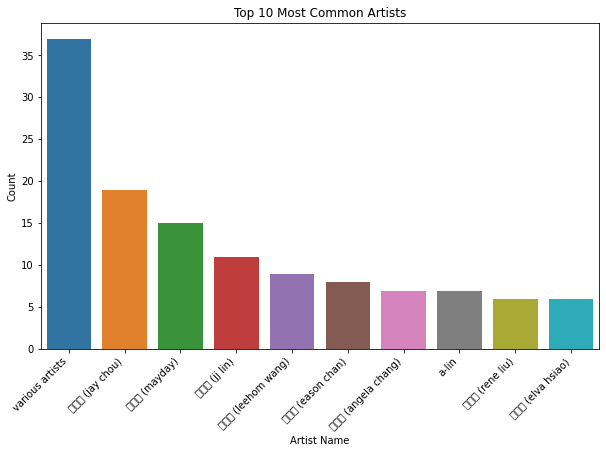

In [78]:
# Top 10 most common artists
top_artists = temp_df['artist_name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Most Common Artists')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artist Name')
plt.ylabel('Count')
plt.show()

c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20523 (\N{CJK UNIFIED IDEOGRAPH-502B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\sit

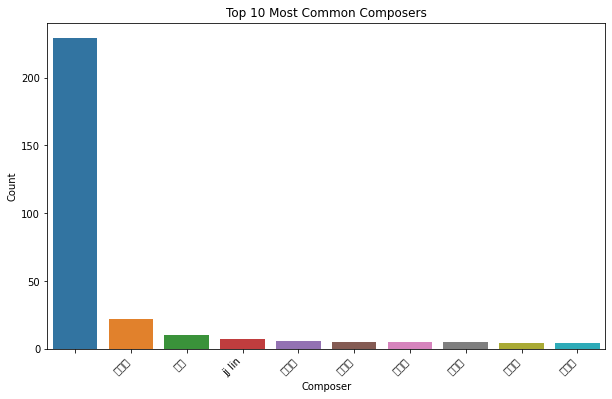

In [79]:
# Top 10 most common composers
top_composers = temp_df['composer'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_composers.index, y=top_composers.values)
plt.title('Top 10 Most Common Composers')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Composer')
plt.ylabel('Count')
plt.show()

c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jonathan\AppData\Local\Programs\Python\Python39\lib\sit

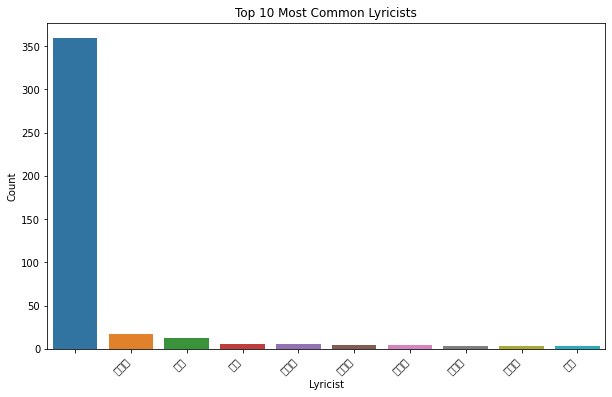

In [80]:
# Top 10 most common lyricists
top_lyricists = temp_df['lyricist'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_lyricists.index, y=top_lyricists.values)
plt.title('Top 10 Most Common Lyricists')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Lyricist')
plt.ylabel('Count')
plt.show()

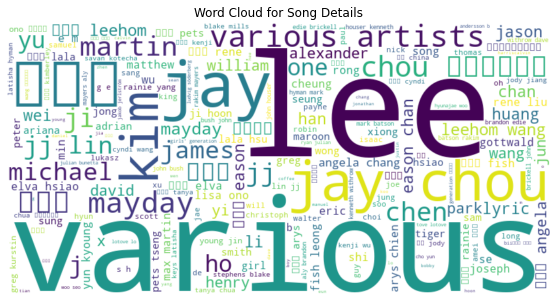

In [82]:

# Word cloud for 'song_details'
from wordcloud import WordCloud

songs_details_text = ' '.join(temp_df['songs_details'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(songs_details_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Song Details')
plt.show()

- In the above code, we are creating a word cloud visualization for the 'song_details' text data in the DataFrame "temp_df". A word cloud is a graphical representation of the most frequent words in a given text corpus, where the size of each word is proportional to its frequency. Word clouds are commonly used to visually display the most prominent words in a text dataset.

#### Feature extraction using TF-IDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer='word',stop_words='english')
tfidf_matrix=tfidf.fit_transform(temp_df['songs_details'])

- At first we import the TfidfVectorizer class from the sklearn.feature_extraction.text module, which is a utility for text feature extraction using the TF-IDF representation.

- After that we create an instance of the TfidfVectorizer class with the specified parameters:
analyzer='word': This specifies that the vectorizer should consider words as the individual features for representing the text data.
stop_words='english': This tells the vectorizer to remove common English stop words (e.g., 'the', 'a', 'an', 'and', etc.) from the text data, as they often do not carry significant meaning for analysis.

- tfidf_matrix = tfidf.fit_transform(temp_df['songs_details']): This line applies the fit_transform() method of the TfidfVectorizer to the 'songs_details' column of the DataFrame "temp_df". The fit_transform() method first learns the vocabulary from the input text (i.e., 'songs_details') and then transforms the text data into a numerical feature matrix using the TF-IDF representation.

- fit_transform(): This method learns the vocabulary of the text data and then converts it into a numerical feature matrix. The result, tfidf_matrix, is a sparse matrix that represents the TF-IDF values of the 'songs_details' text data.

The TF-IDF representation captures the importance of each word in each 'songs_details' text relative to the entire corpus. The more frequently a word appears in a 'songs_details', the higher its TF-IDF score will be. Additionally, words that appear frequently across all 'songs_details' will have lower TF-IDF scores.

This tfidf_matrix can be used as input for various machine learning algorithms to analyze and make recommendations based on the similarity of the songs' characteristics represented by the TF-IDF vectors.

- TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is used before computing cosine similarity in natural language processing and text analysis tasks. Here's why TF-IDF is typically used before cosine similarity:

- Text Representation: In natural language processing, text data needs to be represented as numerical features to be used in machine learning models. TF-IDF is a popular technique to convert raw text data into a numerical vector representation that retains the semantic meaning of the words.

- TF-IDF Weights: TF-IDF calculates the importance of each word in a document relative to the entire corpus. It assigns higher weights to words that appear frequently in a document but are rare across all documents in the corpus. Words that are common across all documents receive lower weights. This way, the TF-IDF vector captures the relative importance of words in each document.

- Dimensionality Reduction: The TF-IDF vector representation reduces the dimensionality of the text data. Each document is represented by a numerical vector, and the vector's dimension is equal to the vocabulary size (the number of unique words) in the corpus.

- Cosine Similarity: Cosine similarity is a metric used to measure the similarity between two vectors. It calculates the cosine of the angle between two vectors and ranges from -1 to 1. A value close to 1 indicates high similarity, while a value close to -1 indicates dissimilarity. A value close to 0 indicates orthogonality (no similarity).

- Cosine Similarity on TF-IDF: After TF-IDF vectorization, each document is represented by a numerical vector in the TF-IDF space. Cosine similarity is then calculated between pairs of vectors representing different documents. The similarity score reflects the semantic similarity of the text content in the documents.

- Text Similarity and Recommendations: In the context of a music recommendation system or text similarity tasks, cosine similarity on TF-IDF vectors helps identify similar songs based on their lyrics, artists, and other text-based attributes. By measuring the cosine similarity between TF-IDF vectors, you can recommend songs that are semantically similar in terms of their textual content.

- Overall, TF-IDF vectorization is an essential step in representing text data for various natural language processing tasks, including music recommendation systems. It allows for meaningful comparisons between documents based on their text content, and cosine similarity on TF-IDF vectors helps identify similar songs for music recommendation purposes.

#### Now implementing Cosine Similarity

In [60]:

from sklearn.metrics.pairwise import cosine_similarity

In [61]:
cosine_similarities=cosine_similarity(tfidf_matrix)


In [62]:
cosine_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [64]:
cosine_similarities.shape

(794, 794)

In [66]:
cosine_similarities[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x:x[1])[1:6]

[(658, 0.23506799063654626),
 (78, 0.10869485994928993),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0)]

- cosine_similarities: This is likely a matrix containing the cosine similarity scores between different songs. For example, if there are N songs, cosine_similarities will be an NxN matrix where each entry represents the cosine similarity score between a pair of songs.

- cosine_similarities[0]: This part extracts the first row of the cosine_similarities matrix. This row represents the cosine similarity scores between the first song and all other songs in the dataset.

- enumerate(cosine_similarities[0]): The enumerate() function is used to iterate over the elements of the first row of cosine_similarities. It returns pairs of (index, value), where index is the index of the element in the row, and value is the cosine similarity score.

- sorted(...): This part sorts the enumerated cosine similarity scores in descending order based on the similarity scores (the second element of each pair). The reverse=True argument indicates that the sorting should be in descending order (highest similarity scores first).

- key=lambda x: x[1]: This is a lambda function used as the key for sorting. It specifies that the sorting should be based on the second element of each pair (i.e., the cosine similarity score).

- [1:6]: Finally, this part slices the sorted list to get the top 5 most similar songs (excluding the first element, which would be the song's similarity to itself since the similarity of a song to itself is always 1).

- To summarize, the code snippet is extracting the cosine similarity scores between the first song and all other songs in the dataset, then sorting these similarity scores in descending order to find the top 5 most similar songs to the first song. The result will be a list of pairs, where each pair contains the index of a song and its corresponding cosine similarity score with the first song.

In [67]:
temp_df.head()

,index,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,,Panda,desiignersidney selby adnan khan
1,2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
2,4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,21,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,1,458,周湯豪 (nickthereal),周湯豪,周湯豪\崔惟楷,帥到分手,周湯豪 (nickthereal)周湯豪周湯豪\崔惟楷
4,73,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,0,458,周湯豪 (nickthereal),周湯豪,周湯豪\崔惟楷,帥到分手,周湯豪 (nickthereal)周湯豪周湯豪\崔惟楷


In [68]:
#In which you can recommend only index
def recommend(song):
    song_index=temp_df[temp_df['song_name']==song].index[0]
    distances=cosine_similarities[song_index]
    song_list=sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x:x[1])[1:6]
    for i in song_list:
        print(i[0])

- Here, the recommend(song) function takes a song name as input, finds the index of that song in the DataFrame "temp_df", retrieves its cosine similarity scores with all other songs, and then recommends the top 5 most similar songs based on their indices in "temp_df". The indices are then printed as recommendations. Note that these indices can be used to retrieve the full song details from the original dataset.

In [70]:
recommend('Panda')

658
78
1
2
3


#### User-based Recommender
- Recommending song name instead of indexes

In [71]:
def recommend(song):
    song_index=temp_df[temp_df['song_name']==song].index[0]
    distances=cosine_similarities[song_index]
    song_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    for i in song_list:
        print(temp_df.iloc[i[0]].song_name)

In [72]:
recommend('Panda')

Tiimmy Turner
La La La
我過的很好
我過的很好
帥到分手
帥到分手
迷些路 (Lost On The Way)
迷些路 (Lost On The Way)
Bokurano Yume
